<a href="https://colab.research.google.com/github/julianopadua/Cotacao-do-Dolar/blob/main/Projeto_Cotacao_do_Dolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introdução**

##1. A ideia do projeto:
>Permeando uma maneira de aplicar meus conhecimentos adquiridos até o momento, surgiu a vontade de criar um notebook voltado para a predição da cotação do dólar em relação ao real. Visto que tenho como ambição trabalhar no mercado financeiro, aproveitei a ideia para além de conhecer mais sobre Machine Learning, aprender um pouco sobre índices inflacionários, taxas e indicativos utilizados no mundo da economia nacional.

##2. A seleção das variáveis de entrada/exógenas:
>Com a ideia em mente, realizei a minha pesquisa por possíveis fatores que influenciam na cotação do dólar. Apesar de parecer uma tarefa simples, encontrar dados que podem influenciar na cotação e que podem ser transpostos em um dataset, foi desafiador. Entretanto, defini 5 variáveis que influenciam direta ou indiretamente na relação dólar-real.

##3. As variáveis
###3.1. O índice Bovespa
>>O Ibovespa pode influenciar a cotação do dólar pois reflete a saúde econômica do Brasil: se o mercado de ações está em alta, investidores estrangeiros podem ver o país como mais atrativo, aumentando a demanda por real e, consequentemente, valorizando-o em relação ao dólar.
###3.2. A taxa Selic
>>A taxa Selic pode afetar a cotação do dólar pois impacta os fluxos de capital. Se a Selic está alta, investimentos em renda fixa nacional se tornam mais atrativos, aumentando a demanda por real e fortalecendo sua posição em relação ao dólar.
###3.3. Os índices inflacionários IPCA e INPC
>>Os índices de inflação nacionais IPCA e INPC têm influência na cotação do dólar devido ao seu peso na política monetária e na confiança dos investidores. A depender do que os índices indicam, o real pode ganhar ou perder força em um cenário internacional, atraindo ou repelindo investidores.
###3.4. O índice inflacionário ICE U.S. Dollar
>>O ICE U.S. Dollar é um índice de referência líder para o valor internacional do dólar dos EUA. Ele acompanha o desempenho do dólar em relação a uma cesta de moedas de outros países importantes, fornecendo uma medida do poder de compra do dólar em comparação com outras moedas globais. Logo, pode ter reflexo na relação dólar-real.

##4. Objetivo
>Com os resultados obtidos, o objetivo é fazer uma análise do quanto os fatores selecionados estão relacionados com a cotação do dólar. Mas, o objetivo de fato é aplicar os conhecimentos existentes e adquirir mais, tanto do mundo financeiro quanto do mundo da inteligência artificial.




#**Primeira parte:** extração de dados e montagem do dataset

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [79]:
dolar = 'USDBRL=X'
indice_ibovespa = '^BVSP'
indice_ICEUS = 'DX-Y.NYB'


data_final = dt.datetime.now()
data_inicial = dt.datetime(2023, 1, 1)


cotacao_dolar = yf.download(dolar, data_inicial, data_final)['Close']
ibovespa = yf.download(indice_ibovespa, data_inicial, data_final)['Adj Close']
ice_usdolar = yf.download(indice_ICEUS, data_inicial, data_final)['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [80]:
caminho_arquivo = 'taxaselic.csv'
selic = pd.read_csv(caminho_arquivo)
selic['Unnamed: 0'] = pd.to_datetime(selic['Unnamed: 0'])
selic = pd.Series(selic['Unnamed: 1'].values, index=selic['Unnamed: 0'])
selic

Unnamed: 0
2023-01-01    13.65
2023-02-01    13.65
2023-03-01    13.65
2023-04-01    13.65
2023-05-01    13.65
2023-06-01    13.65
2023-07-01    13.65
2023-08-01    13.65
2023-08-03    13.15
2023-09-01    13.15
2023-09-21    12.65
2023-10-01    12.65
2023-11-01    12.65
2023-11-03    12.15
2023-12-01    12.15
2023-12-14    11.65
2024-01-01    11.65
2024-02-01    11.25
dtype: float64

In [81]:
#aqui extraio dados de paginas na web

url = 'https://www.mobills.com.br/tabelas/ipca/'
ipca = pd.read_html(url)[2]
ipca = ipca.drop(columns=['IPCA ACUMULADO 12 MESES', 'IPCA ACUMULADO 2023'])

#dict para substituir os meses
meses = {
    'janeiro': '01', 'fevereiro': '02', 'março': '03', 'abril': '04',
    'maio': '05', 'junho': '06', 'julho': '07', 'agosto': '08',
    'setembro': '09', 'outubro': '10', 'novembro': '11', 'dezembro': '12'
}

#conversao de tipos e transformacao de formato para YYYY-MM-DD
ipca['MÊS DE REFERÊNCIA'] = ipca['MÊS DE REFERÊNCIA'].str.lower().replace(meses, regex=True)
ipca['MÊS DE REFERÊNCIA'] = '2023'+'-'+ipca['MÊS DE REFERÊNCIA']+'-'+'01'
ipca['IPCA NO MÊS'] = ipca['IPCA NO MÊS'].str.replace('%', '').str.replace(',', '.').astype(float)
nova_linha = {'MÊS DE REFERÊNCIA': '2024-01-01', 'IPCA NO MÊS': 0.42}
ipca = ipca.append(nova_linha, ignore_index=True)
ipca['MÊS DE REFERÊNCIA'] = pd.to_datetime(ipca['MÊS DE REFERÊNCIA'])

#cria uma serie para ser utilizada numa funcao corretiva no futuro
ipca = pd.Series(ipca['IPCA NO MÊS'].values, index=ipca['MÊS DE REFERÊNCIA'])


<ipython-input-81-4a959c79dfde>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ipca = ipca.append(nova_linha, ignore_index=True)


In [82]:
url = 'https://www.vriconsulting.com.br/indices/inpc.php'
inpc = pd.read_html(url)[0]
inpc = inpc.drop(columns=['Acumulado no ano (em %)', 'Acumulado últimos 12 meses (em %)'])
inpc = inpc.iloc[1:14]

#dict para substituir os meses
meses = {
    'Jan': '01', 'Fev': '02', 'Mar': '03', 'Abr': '04',
    'Mai': '05', 'Jun': '06', 'Jul': '07', 'Ago': '08',
    'Set': '09', 'Out': '10', 'Nov': '11', 'Dez': '12'
}

#conversao e transformacao
inpc['Mês/Ano'] = inpc['Mês/Ano'].str[-4:] + '-' + inpc['Mês/Ano'].str[:3].map(meses) + '-01'
inpc['Índice do mês (em %)'] = inpc['Índice do mês (em %)'].str.replace('-', '-')
inpc['Índice do mês (em %)'] = inpc['Índice do mês (em %)'].astype(int) / 100
inpc['Mês/Ano'] = pd.to_datetime(inpc['Mês/Ano'])
inpc = inpc.iloc[::-1]

#cria a serie
inpc = pd.Series(inpc['Índice do mês (em %)'].values, index=inpc['Mês/Ano'])

In [83]:
def preencher_serie_com_ultimo_valor(serie, inicio):
    #gera o novo indice
    novo_indice = pd.date_range(start=inicio, end=pd.Timestamp.today(), freq='D')

    #substui o indice, e preenche valores nao existentes pelo ultimo valor existente
    serie_preenchida = serie.reindex(novo_indice, method='ffill')

    return serie_preenchida

ibovespa_serie = preencher_serie_com_ultimo_valor(ibovespa, '2023-01-02')
cotacao_serie = preencher_serie_com_ultimo_valor(cotacao_dolar, '2023-01-02')
ice_serie = preencher_serie_com_ultimo_valor(ice_usdolar, '2023-01-02')
serie_inpc = preencher_serie_com_ultimo_valor(inpc, '2023-01-02')
serie_ipca = preencher_serie_com_ultimo_valor(ipca, '2023-01-02')
serie_selic = preencher_serie_com_ultimo_valor(selic, '2023-01-02')

In [84]:
#concatenacao da series para o dataset
df = pd.concat([serie_selic, ice_serie, serie_ipca, serie_inpc, ibovespa_serie, cotacao_serie], axis=1)
df.columns = ['Taxa Selic', 'ICE US Dollar','IPCA','INPC','Ibovespa', 'Cotação do Dólar']
df

,Taxa Selic,ICE US Dollar,IPCA,INPC,Ibovespa,Cotação do Dólar
2023-01-02,13.65,NaN,0.53,0.46,106376.000000,5.285500
2023-01-03,13.65,104.519997,0.53,0.46,104166.000000,5.360131
2023-01-04,13.65,104.250000,0.53,0.46,105334.000000,5.478500
2023-01-05,13.65,105.040001,0.53,0.46,107518.000000,5.430100
2023-01-06,13.65,103.879997,0.53,0.46,108836.000000,5.349800
...,...,...,...,...,...,...
2024-02-18,11.25,104.300003,0.42,0.57,128726.000000,4.972400
2024-02-19,11.25,104.260002,0.42,0.57,129036.000000,4.965100
2024-02-20,11.25,104.080002,0.42,0.57,129916.000000,4.956400
2024-02-21,11.25,104.010002,0.42,0.57,130032.000000,4.926400


#**Segunda parte:** aplicação de modelos de aprendizado supervisionado

In [85]:
#funcao para plotagem dos graficos

def plota_graf_comparativo(inicio, previsoes, df, titulo):
  plt.figure(figsize=(10, 6))
  plt.plot(df.index[inicio:], df['Cotação do Dólar'].iloc[inicio:], label='Valores Reais', color='blue')
  plt.plot(df.index[inicio:], previsoes, label='Previsões', color='red', linestyle='--')
  plt.title(titulo)
  plt.xlabel('Data')
  plt.ylabel('Cotação do Dólar')
  plt.legend()

  plt.show()

##1. Aplicando o modelo Gradient Boosting Regressor

In [86]:
df.dropna(inplace=True)
X = df[['Taxa Selic','ICE US Dollar', 'IPCA', 'INPC', 'Ibovespa']]
y = df['Cotação do Dólar']

#divide os dados em treino e teste, 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#inicializa e treina o modelo GBR
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

#previsoes
y_pred = gbr.predict(X_test)

#avaliacao de acuracia
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)


Erro Quadrático Médio (MSE): 0.001963817891418112
Coeficiente de Determinação (R²): 0.9026915991411402


O gráfico abaixo ajuda a visualizar o Coeficiente de Determinação. Como os valores previstos estão, em sua maioria, próximos à linha de referência, o coeficiente é quase 1.

Entretanto, a cotação do dólar varia "pouco" diariamente, o que, em um universo de todos os números flutuantes, torna as variações absurdas previstas pelo modelo menos impactantes. Isso contribui para uma acurácia tão alta, mas não significa, necessariamente, precisão.

Mas, aparantemente, o modelo consegue acompanhar a tendência da cotação, dada suas limitações.


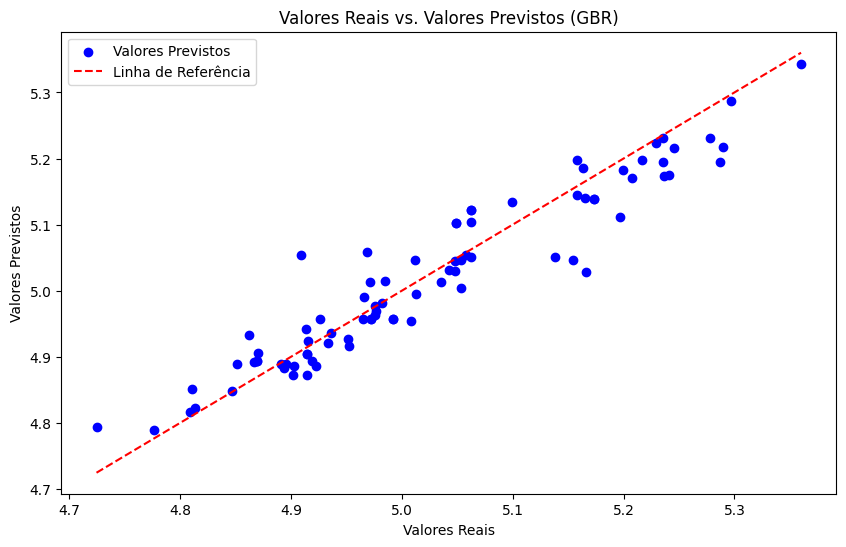

In [87]:
#plotagem do grafico de valores reais x previstos, com linha de referencia
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Valores Previstos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha de Referência')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos (GBR)')
plt.legend()
plt.show()


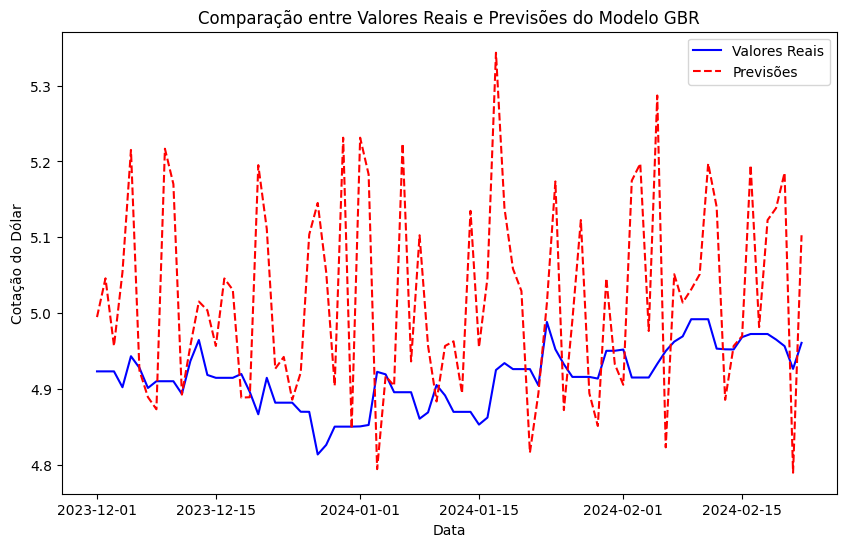

In [88]:
#plotagem do grafico comparativo do periodo de testes
inicio_teste = len(df) - len(y_pred)
plota_graf_comparativo(inicio_teste, y_pred, df, 'Comparação entre Valores Reais e Previsões do Modelo GBR')


##2. Aplicando o modelo de Regressão Linear

In [89]:
#inicializa e treina o modelo de regressao linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#previsao
y_pred = regressor.predict(X_test)

#acuracia
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)


Erro Quadrático Médio (MSE): 0.005359434071156604
Coeficiente de Determinação (R²): 0.7344367004436753


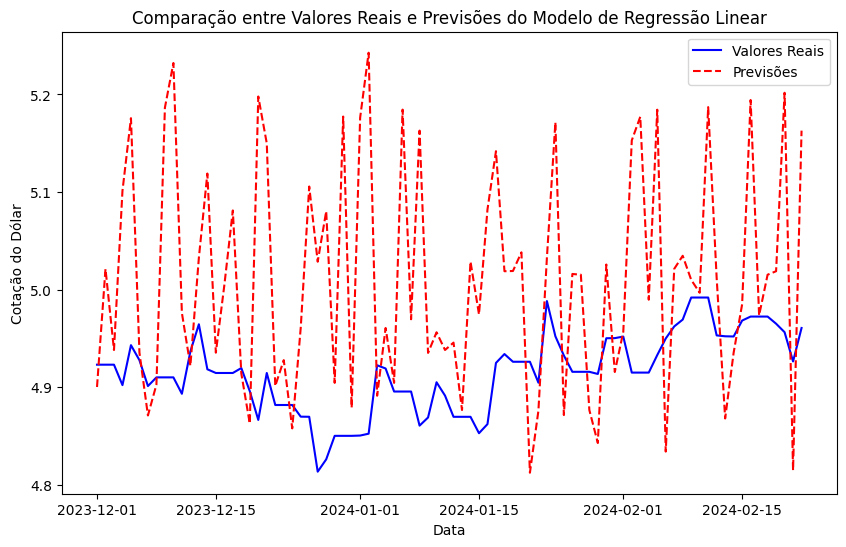

In [90]:
#plotagem do grafico comparativo
inicio_teste = len(df) - len(y_pred)
plota_graf_comparativo(inicio_teste, y_pred, df, 'Comparação entre Valores Reais e Previsões do Modelo de Regressão Linear')

#**Terceira parte:** aplicação do modelo ARIMAX

In [91]:
#para aplicar o modelo ARIMAX, decidi modificar o dataset
#agora, com dados desde 2010, mas apenas do IBOVESPA e do ICE U.S. Dollar

data_final = dt.datetime.now()
data_inicial = dt.datetime(2010, 1, 1)


cotacao_dolar = yf.download(dolar, data_inicial, data_final)['Close']
ibovespa = yf.download(indice_ibovespa, data_inicial, data_final)['Adj Close']
ice_usdolar = yf.download(indice_ICEUS, data_inicial, data_final)['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [92]:
ibovespa_serie = preencher_serie_com_ultimo_valor(ibovespa, '2010-01-02')
cotacao_serie = preencher_serie_com_ultimo_valor(cotacao_dolar, '2010-01-02')
ice_serie = preencher_serie_com_ultimo_valor(ice_usdolar, '2010-01-02')

In [93]:
df = pd.concat([ice_serie, ibovespa_serie, cotacao_serie], axis=1)
df.columns = ['ICE US Dollar', 'Ibovespa', 'Cotação do Dólar']
df

,ICE US Dollar,Ibovespa,Cotação do Dólar
2010-01-02,NaN,NaN,NaN
2010-01-03,NaN,NaN,NaN
2010-01-04,77.529999,70045.000000,1.7190
2010-01-05,77.620003,70240.000000,1.7370
2010-01-06,77.489998,70729.000000,1.7315
...,...,...,...
2024-02-18,104.300003,128726.000000,4.9724
2024-02-19,104.260002,129036.000000,4.9651
2024-02-20,104.080002,129916.000000,4.9564
2024-02-21,104.010002,130032.000000,4.9264


Erro Quadrático Médio do modelo ARIMAX: 0.0015169108629378208


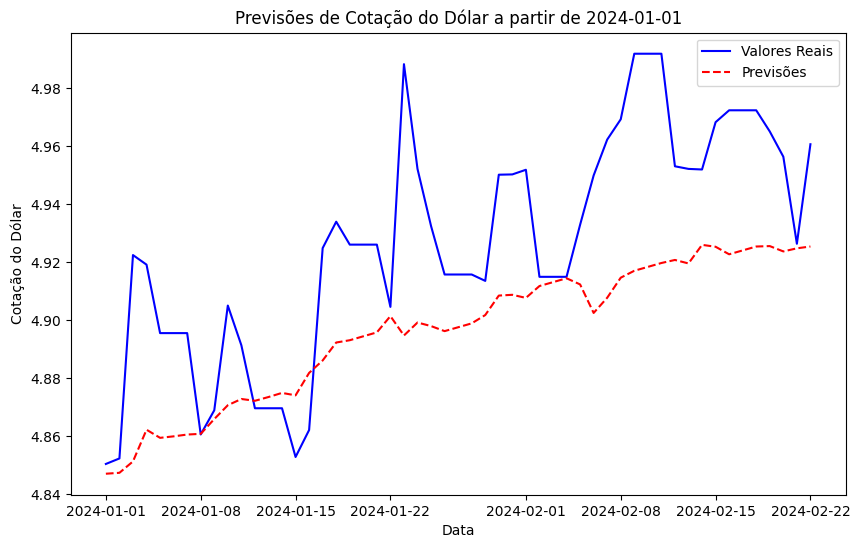

In [94]:
import statsmodels.api as sm

df = df.dropna()
cut_date = '2023-12-31'

train_data = df[df.index <= cut_date]
test_data = df[df.index > cut_date]

#ajuste do modelo arimax
order = (5, 2, 0)  #parametros do modelo ARIMAX (p, d, q)
exog_train = train_data[['Ibovespa', 'ICE US Dollar']]  #features exogenas
arimax_model = sm.tsa.statespace.SARIMAX(train_data['Cotação do Dólar'], order=order, exog=exog_train, freq='D',
                                          enforce_stationarity=False, enforce_invertibility=False).fit()

#previsoes
exog_test = test_data[['Ibovespa', 'ICE US Dollar']]
predictions = arimax_model.predict(start=test_data.index[0], end=test_data.index[-1], exog=exog_test)

mse = mean_squared_error(test_data['Cotação do Dólar'], predictions)
print('Erro Quadrático Médio do modelo ARIMAX:', mse)

inicio_teste = len(df) - len(predictions)
plota_graf_comparativo(inicio_teste, predictions, df, 'Previsões de Cotação do Dólar a partir de 2024-01-01')

#**Conclusão**

##1. Modelos supervisionados
>Ambos modelos utilizados, GBR e Regressão Linear, apresentaram predições condizentes, de certa forma, com a realidade. Entretanto, elas não se comportam bem em curto prazo, variando muito em comparação com o que o dólar de fato varia.

##2. Modelo ARIMAX
>A extensão do modelo ARIMA que permite incorporar variáveis exógenas gerou um resultado quase oposto ao dos anteriores: varia bem menos, mas a longo prazo perde muita precisão.

##3. O que aprendi?
>Obviamente, existe uma relação direta e/ou indireta entre as features selecionadas (Selic, ICE U.S. Dollar, Ibovespa, IPCA e INPC) e a cotação diária do dólar. Caso contrário, o modelo GBR não teria um coeficiente de determinação tão próximo a 1.

>Entretanto, a relação dólar-real é afetada por inúmeros fatores que foram completamente desconsiderados no meu projeto, seja por dificuldade de obtenção de dados, ou por falta de conhecimento da minha parte.

>Logo, não se trata de um projeto realista, muito menos um indicativo que deva ser considerado. Mas o intuito é justamente esse, aprender e aplicar, mesmo que nem sempre algo palpável e de uso real. Espero contar com a compreensão e com a opinião e dicas de todos que lerem o projeto, assim aprenderei ainda mais!

Feito por Juliano Pádua